### experiments using IPC sections for originality 

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

%matplotlib inline
%reload_ext line_profiler



In [3]:
%%time
# read in main data file in the Strata9 .dta format
cite76_06_df = pd.read_stata('cite76_06.dta')


CPU times: user 1.07 s, sys: 731 ms, total: 1.8 s
Wall time: 2.05 s


In [5]:
cite76_06_df.head()

,citing,cited,ncites7606
0,5135226,3930271,6
1,5592695,3930271,6
2,5621918,3930271,6
3,5624296,3930271,6
4,5675839,3930271,6


In [48]:
# get the IPC classes in these backward citations
# Load  data file with inter_ etc

pat76_06_ipc_df = pd.read_csv('pat76_06_ipc_df_modified.csv')

In [96]:
# lets take a row for an example
n = 5000000
focal_patent = cite76_06_df[n:(n+1)].citing.values[0]
focal_patent

4692752

In [97]:
# get all backward citations for this focal patent
example_focal_patent = cite76_06_df[cite76_06_df.citing == focal_patent]
print(example_focal_patent)
# get list of backward citations
backward_citations = example_focal_patent.cited.values.tolist()
backward_citations

          citing    cited  ncites7606
697442   4692752  4010458           6
1396130  4692752  4087706          17
3542953  4692752  4319229          20
4555290  4692752  4422066          10
5000000  4692752  4465998           7
5496836  4692752  4514722          11
6244677  4692752  4586028           5


[4010458, 4087706, 4319229, 4422066, 4465998, 4514722, 4586028]

In [124]:
pat76_06_ipc_df.tail().T

,4856176,4856177,4856178,4856179,4856180
appyear,2000,2000,2000,2000,2000
cat,2,2,2,2,2
gyear,2006,2006,2006,2006,2006
icl,G06F 17/30,G06F 15/16,G06K 9/00,H04L 9/00,H04K 1/00
icl_class,G06F,G06F,G06K,H04L,H04K
icl_maingroup,17,15,9,9,1
iclnum,2,3,4,5,6
nclass,726,726,726,726,726
numipc,6,6,6,6,6
patent,7155745,7155745,7155745,7155745,7155745


In [99]:
# lets start with using only the single character section
blob = []
for citation in backward_citations:
    print(citation)
    temp_section = list(set(pat76_06_ipc_df[pat76_06_ipc_df.patent==citation].section.values))
    print(temp_section)
    blob.append(temp_section)

4010458
['G']
4087706
['H', 'G']
4319229
['G']
4422066
['H', 'G']
4465998
['G']
4514722
['G']
4586028
['G']


In [100]:
blob

[['G'], ['H', 'G'], ['G'], ['H', 'G'], ['G'], ['G'], ['G']]

In [101]:
# get sections of focal patent, for comparison
pat76_06_ipc_df[pat76_06_ipc_df.patent==focal_patent].section.values

array(['G'], dtype=object)

In [122]:
## calculate originality of this patent
number_backward_citations = len(blob)
print('number backward citations = ',number_backward_citations)
# create single list by flattening through numpy concat
flat_list = list(np.concatenate(blob))
print('flat_list = ',flat_list)
# get number of each unique element in this list
unique_elements = list(set(flat_list))
print('unique_elements = ',unique_elements)
zz = [(flat_list.count(i)) for i in set(flat_list) ]

# do the sume of squares for unoriginality
sum = 0
for item in zz:
    print('item = ',item)
    zzz = pow((item/number_backward_citations),2)
    print('zzz = ',zzz)
    sum = sum+zzz
    print('sum = ',sum)
unoriginality = sum
print('unoriginality = ',unoriginality)
originality_focal_patent = 1 - unoriginality
originality_focal_patent

number backward citations =  7
flat_list =  ['G', 'H', 'G', 'G', 'H', 'G', 'G', 'G', 'G']
unique_elements =  ['H', 'G']
item =  2
zzz =  0.08163265306122448
sum =  0.08163265306122448
item =  7
zzz =  1.0
sum =  1.0816326530612246
unoriginality =  1.0816326530612246


-0.08163265306122458

In [138]:
## calculate originality of this patent, made into a function
def get_section_originality(focal_patent):
    example_focal_patent = cite76_06_df[cite76_06_df.citing == focal_patent]
    # print(example_focal_patent)
    # get list of backward citations
    backward_citations = example_focal_patent.cited.values.tolist()
    backward_citations
    blob = []
    for citation in backward_citations:
        #print(citation)
        temp_section = list(set(pat76_06_ipc_df[pat76_06_ipc_df.patent==citation].section.values))
        #print(temp_section)
        blob.append(temp_section)
    
    number_backward_citations = len(blob)
    #print('number backward citations = ',number_backward_citations)
    # create single list by flattening through numpy concat
    flat_list = list(np.concatenate(blob))
    #print('flat_list = ',flat_list)
    # get number of each unique element in this list
    unique_elements = list(set(flat_list))
    #print('unique_elements = ',unique_elements)
    zz = [(flat_list.count(i)) for i in set(flat_list) ]

    # do the sum of squares for unoriginality
    sum = 0
    for item in zz:
        #print('item = ',item)
        zzz = pow((item/number_backward_citations),2)
        #print('zzz = ',zzz)
        sum = sum+zzz
        #print('sum = ',sum)
    unoriginality = sum
    #print('unoriginality = ',unoriginality)
    originality_focal_patent = 1 - unoriginality
    return(originality_focal_patent)

In [260]:
## calculate sctions in this patent,  a function
def get_section_count(focal_patent):
    example_focal_patent = cite76_06_df[cite76_06_df.citing == focal_patent]
    # print(example_focal_patent)
    # get list of backward citations
    backward_citations = example_focal_patent.cited.values.tolist()
    accumulator = []
    for citation in backward_citations:
        #print(citation)
        temp_section = list(set(pat76_06_ipc_df[pat76_06_ipc_df.patent==citation].section.values))
        #print(temp_section)
        accumulator.append(temp_section)
    
    number_backward_citations = len(accumulator)
    #print('number backward citations = ',number_backward_citations)
    # create single list by flattening through numpy concat
    flat_list = list(np.concatenate(accumulator))
    #print('flat_list = ',flat_list)
    # get number of each unique element in this list
    num_unique_elements = len(set(flat_list))
    #print('unique_elements = ',unique_elements)
    return(num_unique_elements)

In [261]:
j=7155745
%lprun -f get_section_count(j) xx= get_section_count(j)
xx= get_section_count(j)
xx

/Users/ahuxor/anaconda/lib/python3.4/site-packages/line_profiler.py:294: UserWarning: Could not extract a code object for the object 2
  profile = LineProfiler(*funcs)


2

In [262]:
get_section_count(7155745)

2

In [146]:
pat76_06_assg_df = pd.read_stata('pat76_06_assg.dta')



In [147]:
pat76_06_assg_df.head().T

,0,1,2,3,4
allcites,6,0,20,4,1
appyear,1974,1974,1975,1974,1975
asscode,2,2,2,1,1
assgnum,1,1,1,NaN,NaN
cat,6,6,6,5,6
cat_ocl,6,6,6,NaN,6
cclass,2/161.4,5/11,5/430,114/354,12/142S
country,US,US,US,,
ddate,NaT,NaT,NaT,NaT,NaT
gday,6,6,6,6,6


In [344]:
sample_patents = cite76_06_df[1000000:1015000].citing.values.tolist()
len(sample_patents)

15000

In [345]:
%%time
!date
# works up to 15000 patents, with t=35 mins
patent_list = []
sections_counts_list = []
num_forward_cites_list = []
for patent in sample_patents:
    xx = get_section_count(patent)
    patent_list.append(patent)
    sections_counts_list.append(xx)
    num_forward_cites = pat76_06_assg_df[pat76_06_assg_df.patent == patent].allcites.values[0]
    num_forward_cites_list.append(num_forward_cites)

Tue 22 Aug 2017 17:10:02 BST
CPU times: user 33min 15s, sys: 1min 30s, total: 34min 46s
Wall time: 35min 10s


In [346]:
# create dataframe from these lists
section_counts_df = pd.DataFrame(
    {'patent': patent_list,
     'number_of_sections': sections_counts_list,
     'forward_citations': num_forward_cites_list
    })

In [347]:
section_counts_df.head()

,forward_citations,number_of_sections,patent
0,11,3,4594177
1,12,3,4681790
2,6,3,5286263
3,37,3,5350795
4,12,3,5439610


/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10


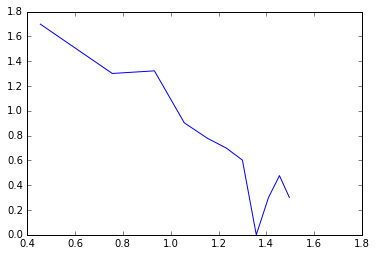

In [358]:
one_section=section_counts_df[section_counts_df.number_of_sections==1]
two_section=section_counts_df[section_counts_df.number_of_sections==2]
three_section=section_counts_df[section_counts_df.number_of_sections==3]
four_section=section_counts_df[section_counts_df.number_of_sections==4]
five_section=section_counts_df[section_counts_df.number_of_sections==5]
six_section=section_counts_df[section_counts_df.number_of_sections==6]
seven_section=section_counts_df[section_counts_df.number_of_sections==7]
eight_section=section_counts_df[section_counts_df.number_of_sections==8]



#plot distribution of one section
counts,bins = np.histogram(seven_section.forward_citations,bins=20)

slope_list = []
intercept_list = []
R_squared_list = []

x = bins[1:]
y = counts

logx = np.log10(x)
logy = np.log10(y)
plt.plot(logx,logy)

In [359]:
1.0/.8

1.25

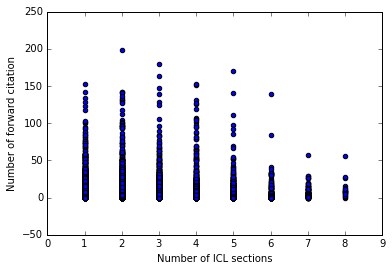

In [246]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel('Number of ICL sections')
ax.set_ylabel('Number of forward citation')
plt.scatter(sections_counts_list,num_forward_cites_list)


plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/section_counts_citations_scatter.pdf", bbox_inches = 'tight')
plt.show()


In [ ]:
%%time
# works up to 5000 patents, with t=13 mins
patent_list = []
originality_list = []
num_forward_cites_list = []
for patent in sample_patents:
    xx = get_section_originality(patent)
    patent_list.append(patent)
    originality_list.append(xx)
    num_forward_cites = pat76_06_assg_df[pat76_06_assg_df.patent == patent].allcites.values[0]
    num_forward_cites_list.append(num_forward_cites)

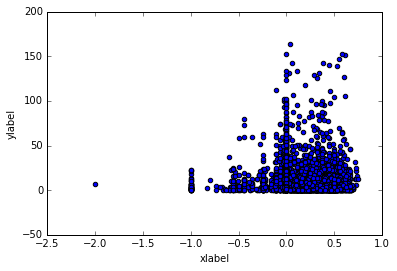

In [207]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')
plt.scatter(originality_list,num_forward_cites_list)


plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/section_orig_citations_scatter.pdf", bbox_inches = 'tight')
plt.show()
